# Apple Stock

### Introduction:

We are going to use Apple's stock price.


### Step 1.필요한 librarie들을 import 하세요

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Step 2. 다음과 같은 DataSet을 import 하세요 [address](https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/09_Time_Series/Apple_Stock/appl_1980_2014.csv)

### Step 3. apple 라는 변수에 DataFrame을 할당 하세요

In [2]:
url = "https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/09_Time_Series/Apple_Stock/appl_1980_2014.csv"
apple = pd.read_csv(url)

apple.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
1,2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2,2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
3,2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
4,2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52


### Step 4. 각 column들의 data type을 확인하세요

In [6]:
apple.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Volume         int64
Adj Close    float64
dtype: object

### Step 5. Date column을 datetime type으로 변경하세요

In [7]:
apple.Date = pd.to_datetime(apple.Date)

### Step 6. Date column을 index로 설정하세요

In [8]:
apple.set_index("Date", inplace=True)
apple.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52


### Step 7. 중복된 date가 존재 하는지 확인하세요

In [9]:
apple.index.is_unique

True

### Step 8. index를 오름차순으로 정렬하세요.

In [16]:
apple.sort_index(ascending= True, inplace=True)
apple.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
1980-12-12,28.75,28.87,28.75,28.75,117258400,0.45
1980-12-15,27.38,27.38,27.25,27.25,43971200,0.42
1980-12-16,25.37,25.37,25.25,25.25,26432000,0.39
1980-12-17,25.87,26.00,25.87,25.87,21610400,0.40
1980-12-18,26.63,26.75,26.63,26.63,18362400,0.41


### Step 9. 매월 마지막 영업일 가져오세요 (business day of each month)

In [17]:
apple.resample("BM").mean()
apple.resample("BM").sum()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
1980-12-31,396.26,397.38,395.76,395.76,336212800,6.15
1981-01-30,666.85,668.36,664.75,664.75,152247200,10.37
1981-02-27,503.12,504.87,501.75,501.75,80404800,7.81
1981-03-31,548.63,550.37,546.40,546.40,175179200,8.53
1981-04-30,573.02,574.73,571.77,571.77,134232000,8.89
...,...,...,...,...,...,...
2014-03-31,11205.46,11265.53,11131.49,11197.50,1250424700,1590.75
2014-04-30,11341.72,11431.33,11261.51,11362.56,1608765200,1614.21
2014-05-30,12627.34,12733.83,12564.99,12667.11,1433917100,1807.23


In [18]:
apple.resample("BM").last()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
1980-12-31,34.25,34.25,34.13,34.13,8937600,0.53
1981-01-30,28.50,28.50,28.25,28.25,11547200,0.44
1981-02-27,26.50,26.75,26.50,26.50,3690400,0.41
1981-03-31,24.75,24.75,24.50,24.50,3998400,0.38
1981-04-30,28.38,28.62,28.38,28.38,3152800,0.44
...,...,...,...,...,...,...
2014-03-31,539.23,540.81,535.93,536.74,42167300,76.25
2014-04-30,592.64,599.43,589.80,590.09,114160200,83.83
2014-05-30,637.98,644.17,628.90,633.00,141005200,90.43


### Step 10. 주가가 등록된 첫날과 마지막 날의 차이는 몇일인가요?

In [25]:
apple.index.max() - apple.index.min()

Timedelta('12261 days 00:00:00')

In [27]:
apple.index[-1] - apple.index[0]

Timedelta('12261 days 00:00:00')

### Step 11. 영업달 기준으로 몇달간의 데이터가 저장되어있나요?

In [29]:
len(apple.resample("BM").count())

404

In [32]:
result_month = (apple.index[0]-apple.index[-1]) / np.timedelta64(1, 'M')#?????

### Step 12. 'Adj Close'값을 이용해 종가 그래프를 그려보세요
- `plt.plot`
- 코드를 강사와 공유해 보세요

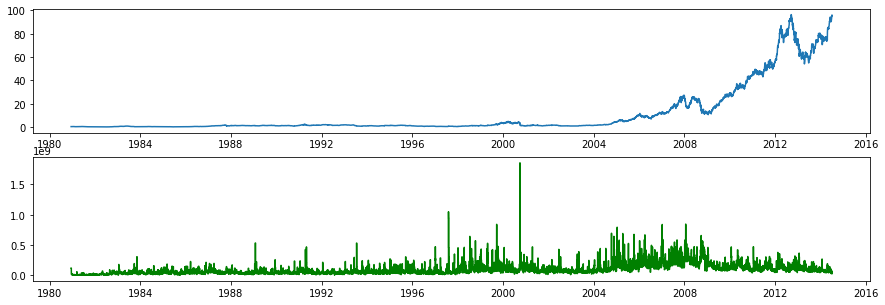

In [40]:
fig = plt.figure()
fig.set_size_inches(15, 5)
ax_1 = fig.add_subplot(2,1,1)
ax_1.plot(apple.index, apple["Adj Close"])

ax_2 = fig.add_subplot(2,1,2)
ax_2.plot(apple.index, apple["Volume"], drawstyle= "steps-post", color = "g")
plt.show()

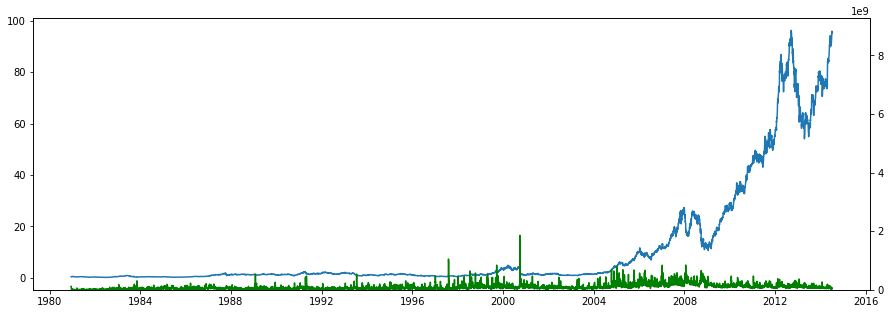

In [46]:
# x축은공유하고 y축은 두개
fig = plt.figure()
fig.set_size_inches(15, 5)
ax_1 = fig.add_subplot(1,1,1)
ax_1.plot(apple.index, apple["Adj Close"])

ax_2 = ax_1.twinx()
ax_2.plot(apple.index, apple["Volume"], drawstyle= "steps-post", color = "g")
ax_2.set_ylim([0, apple["Volume"].max()*5])
plt.show()